In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initial data table with no changes

In [351]:
sleep_data = pd.read_csv('Sleep_Efficiency.csv')
sleep_data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


# Cleaning proccess
Some things seem to be missing so i will assume that Caffeine and Alcohol are meant to be 0. Awakening is being filled with the average.

In [352]:
sleep_data = sleep_data.drop(['ID'], axis=1) # Removing ID because it is not needed
sleep_data.isnull().sum() # Checking how many null values there are

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [353]:
sleep_data[['Caffeine consumption', 'Alcohol consumption']] = sleep_data[['Caffeine consumption', 'Alcohol consumption']].fillna(value=0)
AwakeningMean = sleep_data['Awakenings'].mean()
print('AwakeningMean: ' + str(AwakeningMean))
sleep_data['Awakenings'] = sleep_data['Awakenings'].fillna(value=AwakeningMean)
sleep_data.isnull().sum() # Checking how many null values there are

AwakeningMean: 1.6412037037037037


Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        6
dtype: int64

# Exporation
BedTime and Wakeup Time have been expanded for better catagorization

In [354]:
#sleep_data.insert(4, 'Date', 0, True)
#sleep_data["Date"] = sleep_data["Bedtime"].date
#sleep_data["time"] = sleep_data["Bedtime"].time
sleep_data[['Bed date', 'Bedtime']] = sleep_data['Bedtime'].str.split(' ', 1, expand=True)
sleep_data[['Wakeup date', 'Wakeup time']] = sleep_data['Wakeup time'].str.split(' ', 1, expand=True)
sleep_data

/tmp/ipykernel_2986/1395078951.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sleep_data[['Bed date', 'Bedtime']] = sleep_data['Bedtime'].str.split(' ', 1, expand=True)
/tmp/ipykernel_2986/1395078951.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sleep_data[['Wakeup date', 'Wakeup time']] = sleep_data['Wakeup time'].str.split(' ', 1, expand=True)


,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bed date,Wakeup date
0,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,2021-03-06,2021-03-06
1,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2021-12-05,2021-12-05
2,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,2021-05-25,2021-05-25
3,40,Female,02:30:00,08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2021-11-03,2021-11-03
4,57,Male,01:00:00,09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,2021-03-13,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,22:00:00,05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,2021-11-13,2021-11-13
448,52,Male,21:00:00,03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,2021-03-31,2021-03-31
449,40,Female,23:00:00,07:30:00,8.5,0.55,20,32,48,1.0,0.0,3.0,Yes,0.0,2021-09-07,2021-09-07
450,45,Male,21:00:00,04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,2021-07-29,2021-07-29


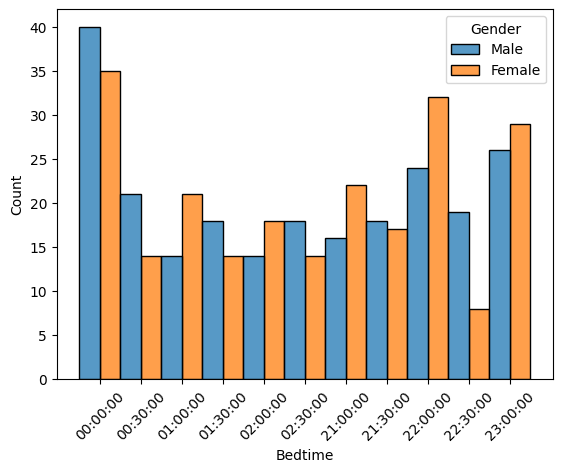

In [355]:
sleep_data = sleep_data.sort_values('Bedtime')
sns.histplot(sleep_data, x='Bedtime', hue='Gender', multiple='dodge')
plt.xticks(rotation=45)
plt.show()